## Data Collection/Processing:

In [33]:
import pandas as pd
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Loading the dataset
covid_df = pd.read_csv('covid.train.csv')

## Feature Selection

In [34]:
feat = covid_df.drop('tested_positive.2', axis=1)
tar = covid_df['tested_positive.2']

# Using Random Forest
rand_for = RandomForestRegressor()
rand_for.fit(feat, tar)
imp = rand_for.feature_importances_

imp_thres = np.percentile(imp, 75)
imp_feat = feat.columns[imp >= imp_thres]
feat = feat[imp_feat]

## Data Preprocessing

In [35]:
scaler = StandardScaler()
feat = scaler.fit_transform(feat)

# Splitting the data into training and validation
ft_train, ft_val, tar_train, tar_val = train_test_split(feat, tar, test_size=0.2, random_state=42)

ft_train = torch.tensor(ft_train, dtype=torch.float)
tar_train = torch.tensor(tar_train.values, dtype=torch.float)
ft_val = torch.tensor(ft_val, dtype=torch.float)
tar_val = torch.tensor(tar_val.values, dtype=torch.float)

t_loader = DataLoader(TensorDataset(ft_train, tar_train), batch_size=32, shuffle=True)
v_loader = DataLoader(TensorDataset(ft_val, tar_val), batch_size=32)

## Model training

C:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incor

Epoch 1, Training RMSE: 15.887764305140417, Validation RMSE: 11.20869594587742
Epoch 2, Training RMSE: 9.423351642127807, Validation RMSE: 8.76277955878423
Epoch 3, Training RMSE: 8.441810796547012, Validation RMSE: 8.340700145557205
Epoch 4, Training RMSE: 8.145870176709948, Validation RMSE: 8.163306762863668
Epoch 5, Training RMSE: 8.020961269896064, Validation RMSE: 8.045051407289098
Epoch 6, Training RMSE: 7.92461817889241, Validation RMSE: 7.9811263160447465
Epoch 7, Training RMSE: 7.879953021772014, Validation RMSE: 7.952164010309616
Epoch 8, Training RMSE: 7.84021049618207, Validation RMSE: 7.913211697696365
Epoch 9, Training RMSE: 7.831163319053861, Validation RMSE: 7.882291294556811
Epoch 10, Training RMSE: 7.799213821756001, Validation RMSE: 7.863651864727322
Epoch 11, Training RMSE: 7.771404202274422, Validation RMSE: 7.84599838055431
Epoch 12, Training RMSE: 7.773934367665005, Validation RMSE: 7.84294450055542
Epoch 13, Training RMSE: 7.747249933296755, Validation RMSE: 7.8

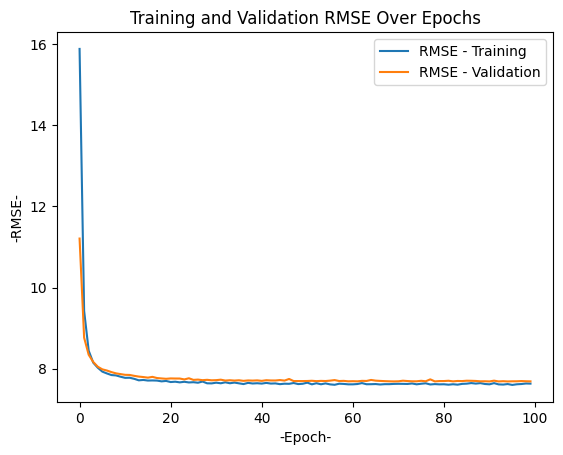

Final Validation RMSE: 7.6847352465903365


In [36]:
model = nn.Sequential(
    nn.Linear(ft_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

criterion = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

t_rmse = []
v_rmse = []

for epoch in range(100): 
    e_losses = []
    model.train()  
    
    for features, target in t_loader:
        opt.zero_grad()
        op = model(features)
        loss = criterion(op, target)
        loss.backward()
        opt.step()
        e_losses.append(loss.item())
    
    avg_e_loss = sum(e_losses) / len(e_losses)
    rmse_e_loss = np.sqrt(avg_e_loss)
    t_rmse.append(rmse_e_loss)
    
    v_losses = []
    model.eval()  
    with torch.no_grad():
        for features, target in v_loader:
            op = model(features)
            loss = criterion(op, target)
            v_losses.append(loss.item())
    
    avg_v_loss = sum(v_losses) / len(v_losses)
    rmse_v_loss = np.sqrt(avg_v_loss)
    v_rmse.append(rmse_v_loss)
    
    print(f'Epoch {epoch+1}, Training RMSE: {rmse_e_loss}, Validation RMSE: {rmse_v_loss}')

plt.plot(t_rmse, label='RMSE - Training')
plt.plot(v_rmse, label='RMSE - Validation')
plt.xlabel('-Epoch-')
plt.ylabel('-RMSE-')
plt.title('Training and Validation RMSE Over Epochs')
plt.legend()
plt.show()

final_v_rmse = v_rmse[-1]
print(f'Final Validation RMSE: {final_v_rmse}')


## Hperparameter Tuning

C:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1, Training RMSE: 12.843603790398804, Validation RMSE: 5.411384258775825
Epoch 2, Training RMSE: 4.854353259335809, Validation RMSE: 3.3328535174059235
Epoch 3, Training RMSE: 3.729082521639867, Validation RMSE: 2.667205914385466
Epoch 4, Training RMSE: 3.30726697817421, Validation RMSE: 2.2616312106343823
Epoch 5, Training RMSE: 3.0419036757269104, Validation RMSE: 2.059493389368374
Epoch 6, Training RMSE: 3.064569906600242, Validation RMSE: 1.9564917916984064
Epoch 7, Training RMSE: 2.840335016069955, Validation RMSE: 1.8016130075108001
Epoch 8, Training RMSE: 2.7372576737203644, Validation RMSE: 1.7307465507206585
Epoch 9, Training RMSE: 2.7206872714321646, Validation RMSE: 1.6921100351953
Epoch 10, Training RMSE: 2.693351885210729, Validation RMSE: 1.5641829929856446
Epoch 11, Training RMSE: 2.6063068729695185, Validation RMSE: 1.4646934880996838
Epoch 12, Training RMSE: 2.6304778369598725, Validation RMSE: 1.7041000749410171
Epoch 13, Training RMSE: 2.5957052639175875, Valid

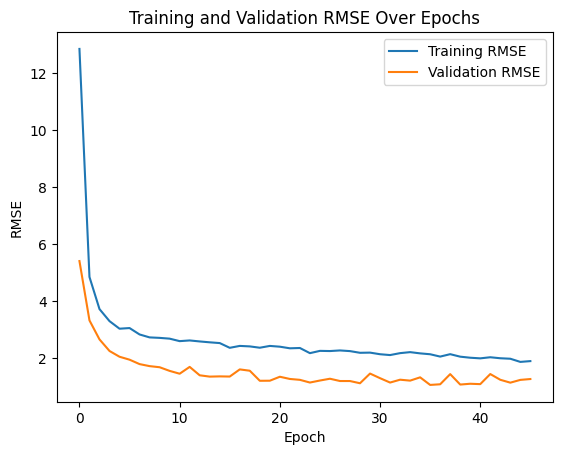

Final Validation RMSE: 1.2785205556517643


In [45]:
input_dim = ft_train.shape[1]
model = nn.Sequential(
    nn.Linear(input_dim, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

criterion = nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
sch = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5, verbose=True)

early_stp = 10
best_val_loss = float('inf')
stop_counter = 0

t_rmse = []
v_rmse = []

for epoch in range(100):
    model.train()
    e_losses = []
    for features, target in t_loader:
        opt.zero_grad()
        output = model(features)
        loss = criterion(output, target.unsqueeze(1))
        loss.backward()
        opt.step()
        e_losses.append(loss.item())
    
    avg_e_loss = sum(e_losses) / len(e_losses)
    rmse_e_loss = np.sqrt(avg_e_loss)
    t_rmse.append(rmse_e_loss)
    
    model.eval()
    v_losses = []
    with torch.no_grad():
        for features, target in v_loader:
            op = model(features)
            loss = criterion(op, target.unsqueeze(1))
            v_losses.append(loss.item())
    
    avg_v_loss = sum(v_losses) / len(v_losses)
    rmse_v_loss = np.sqrt(avg_v_loss)
    v_rmse.append(rmse_v_loss)
    
    print(f'Epoch {epoch+1}, Training RMSE: {rmse_e_loss}, Validation RMSE: {rmse_v_loss}')
    
    if rmse_v_loss < best_val_loss:
        best_val_loss = rmse_v_loss
        stop_counter = 0
        best_model = model.state_dict()
    else:
        stop_counter += 1
    
    if stop_counter >= early_stp:
        print("Early stopping triggered.")
        break

    sch.step(avg_v_loss)

model.load_state_dict(best_model)

plt.plot(t_rmse, label='Training RMSE')
plt.plot(v_rmse, label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE Over Epochs')
plt.legend()
plt.show()


final_v_rmse = v_rmse[-1]
print(f'Final Validation RMSE: {final_v_rmse}')

## Testing

In [44]:
covid_test_df = pd.read_csv('covid.test.csv')

test_ft = scaler.transform(feat)  
test_ft = torch.tensor(test_ft, dtype=torch.float)

model.eval()
with torch.no_grad():
    test_predictions = model(test_ft).numpy()

# Saving to csv file
submission_df = pd.DataFrame({'Predicted': test_predictions.flatten()})
submission_df.to_csv('covid_predictions.csv', index=False)


C:\Users\shrey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


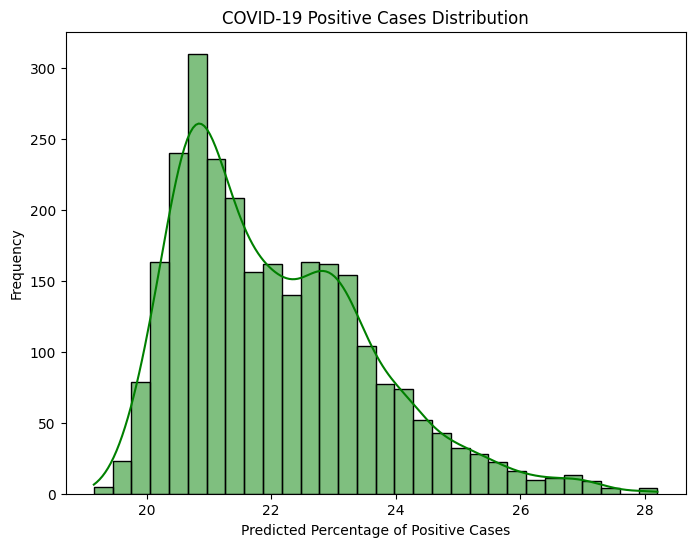

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

predict = pd.read_csv('covid_predictions.csv')

plt.figure(figsize=(8, 6))
sns.histplot(predictions['Predicted'], bins=30, kde=True, color='green')
plt.title('COVID-19 Positive Cases Distribution')
plt.xlabel('Predicted Percentage of Positive Cases')
plt.ylabel('Frequency')
plt.show()


